In [1]:
from functools import lru_cache
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)

@lru_cache(maxsize=None)
def fetch_data_from_source(file):
    '''
    Files:
        f1sim-data-2022.parquet
        f1sim-data-2023.parquet

        f1sim-data-dictionary.xlsx

        f1sim-ref-left.csv
        f1sim-ref-line.csv
        f1sim-ref-right.csv
        f1sim-ref-turns.csv
    '''
    if file.split(".")[1] == "parquet":
        df = pd.read_parquet(f"https://data3001-racing.s3.ap-southeast-2.amazonaws.com/{file}")
    elif file.split(".")[1] == "csv":
        df = pd.read_csv(f"https://data3001-racing.s3.ap-southeast-2.amazonaws.com/{file}", index_col = 0)
    elif file.split(".")[1] == "xlsx":
        df = pd.read_excel(f"https://data3001-racing.s3.ap-southeast-2.amazonaws.com/{file}")
    return df

In [2]:
left = fetch_data_from_source('f1sim-ref-left.csv')
right = fetch_data_from_source('f1sim-ref-right.csv')
line = fetch_data_from_source('f1sim-ref-line.csv')
turns = fetch_data_from_source('f1sim-ref-turns.csv')

In [3]:
df = fetch_data_from_source('track_ratio.csv')
df["on_track"] = np.where(df["track_ratio_left"]+df["track_ratio_right"]<1.1, 1, 0)

df['agg'] = df['SESSION_IDENTIFIER'].astype(str) + '_' + df['LAP_NUM'].astype(str)

In [250]:
df = df[(df["WORLDPOSX"] < 500) & (df["WORLDPOSX"] > 200) & (df["WORLDPOSY"] < 400) & (df["WORLDPOSY"] > -100)]

In [255]:
df

,LAP_INDEX,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,SPEED_KPH,THROTTLE,BRAKE,GEAR,ENGINE_RPM,STEERING,YAW,PITCH,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ,left_shortest,right_shortest,left_closest,right_closest,left_closest_x,left_closest_y,right_closest_x,right_closest_y,track_width,track_ratio_left,track_ratio_right,on_track,agg
29,1,1.003468e+19,1709,1,1,123.269333,1468,30129,18569,87226.0,38528.0,307.0,1.0,0.031952,8.0,11011.0,0.009110,-2.346334,0.004660,-0.030272,201.282669,381.607056,2.266734,-23396.0,-152.0,-22939.0,22926.0,991.0,-23389.0,2.550950,11.135762,"(203.239501953125, 383.2435607910156)","(194.27964782714844, 372.9489440917969)",203.239502,383.243561,194.279648,372.948944,13.647642,0.186915,0.815948,1,1.00346768666644e+19_1
30,1,1.003468e+19,1710,1,1,127.548920,1518,30129,18569,87226.0,38528.0,308.0,1.0,0.030945,8.0,11023.0,0.002976,-2.347822,0.001766,-0.029964,204.342453,378.613342,2.244603,-23362.0,-57.0,-22974.0,22963.0,981.0,-23353.0,2.594678,11.071368,"(206.15982055664065, 380.4652404785156)","(196.74839782714844, 370.5569458007813)",206.159821,380.465240,196.748398,370.556946,13.665620,0.189869,0.810162,1,1.00346768666644e+19_1
31,1,1.003468e+19,1711,1,1,131.838852,1568,30129,18569,87226.0,38528.0,308.0,1.0,0.030945,8.0,11043.0,-0.002884,-2.348564,0.003683,-0.029734,207.405945,375.608734,2.234237,-23345.0,-120.0,-22992.0,22979.0,974.0,-23338.0,2.669278,11.040806,"(209.08413696289065, 377.6844787597656)","(199.6254119873047, 367.7752990722656)",209.084137,377.684479,199.625412,367.775299,13.698880,0.194854,0.805964,1,1.00346768666644e+19_1
32,1,1.003468e+19,1712,1,1,136.129898,1618,30129,18569,87226.0,38528.0,309.0,1.0,0.030945,8.0,11052.0,-0.003616,-2.348275,0.003093,-0.028072,210.467972,372.601074,2.218323,-23352.0,-101.0,-22985.0,22974.0,919.0,-23345.0,2.920416,11.023961,"(211.5960998535156, 375.2947998046875)","(203.3213348388672, 364.2074279785156)",211.596100,375.294800,203.321335,364.207428,13.834795,0.211092,0.796829,1,1.00346768666644e+19_1
33,1,1.003468e+19,1713,1,1,140.429642,1668,30129,18569,87226.0,38528.0,309.0,1.0,0.032959,8.0,11066.0,-0.006546,-2.347550,0.005300,-0.026154,213.535660,369.586853,2.195027,-23368.0,-173.0,-22968.0,22957.0,856.0,-23364.0,2.974128,10.970134,"(216.1992950439453, 370.909912109375)","(206.18458557128903, 361.4440307617188)",216.199295,370.909912,206.184586,361.444031,13.780323,0.215824,0.796072,1,1.00346768666644e+19_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278068,1359,9.988606e+18,3216,2,1,687.343750,11311,32563,18983,91857.0,40311.0,255.0,1.0,0.000000,6.0,11680.0,0.024033,-2.320335,-0.005294,0.031179,487.998993,-55.019951,3.080892,-23985.0,173.0,-22323.0,22309.0,-1021.0,-23977.0,8.963004,1.035062,"(494.4578247070313, -48.80553817749024)","(487.2395324707031, -55.72320938110352)",494.457825,-48.805538,487.239532,-55.723209,9.997896,0.896489,0.103528,1,9.988605802332391e+18_2
278069,1359,9.988606e+18,3218,2,1,690.916016,11361,32563,18983,91857.0,40311.0,256.0,1.0,0.000000,6.0,11736.0,0.057176,-2.324934,-0.003131,0.030839,490.592804,-57.458065,3.095754,-23882.0,102.0,-22434.0,22421.0,-1010.0,-23873.0,8.916624,1.226806,"(496.6664123535156, -50.92985916137695)","(490.2727355957031, -58.64238357543945)",496.666412,-50.929859,490.272736,-58.642384,10.018090,0.890052,0.122459,1,9.988605802332391e+18_2
278070,1359,9.988606e+18,3219,2,1,694.507812,11411,32563,18983,91857.0,40311.0,257.0,1.0,0.000000,6.0,11628.0,0.044541,-2.334668,-0.004903,0.030071,493.190674,-59.918903,3.109276,-23662.0,160.0,-22665.0,22651.0,-985.0,-23655.0,8.891868,1.198306,"(498.8664245605469, -53.07411193847656)","(492.09759521484375, -60.40993881225586)",498.866425,-53.074112,492.097595,-60.40993

In [257]:
temp_df = df.drop_duplicates(subset='LAP_INDEX')

In [260]:
temp_df[temp_df["SECTOR_1_TIME_MS"]> 20000]["SECTOR_1_TIME_MS"].sort_values()

34156     27404
86148     27500
277396    27585
34612     27585
219175    27629
          ...  
112253    59158
175965    59248
211267    60794
182467    62956
173777    63283
Name: SECTOR_1_TIME_MS, Length: 540, dtype: int64

In [86]:
ls = df["agg"].unique()
ls_legit = []

for elem in ls:
    new = df[df["agg"] == elem]

    entry = 0
    within = 0
    exit = 0
    off_track = 0

    for i, res in new.iterrows():
        if (200 < res["WORLDPOSX"] < 350) & (200 < res["WORLDPOSY"] < 400):
            entry += 1
        if (350 < res["WORLDPOSX"] < 400) & (100 < res["WORLDPOSY"] < 250):
            within += 1
        if (350 < res["WORLDPOSX"] < 500) & (-100 < res["WORLDPOSY"] < 100):
            exit += 1
        if res["on_track"] == 0:
            off_track += 1

    if (entry >= 1) & (within >= 1) & (exit >= 1) & (off_track == 0):
        ls_legit.append(elem)

In [87]:
df = df[df['agg'].isin(ls_legit)]

In [88]:
grouped = df.groupby(["agg"])
result = grouped["SPEED_KPH"].last()

last_time = pd.DataFrame(result)
last_time

,SPEED_KPH
agg,
1.00346768666644e+19_1,264.0
1.00346768666644e+19_2,264.0
1.0045550089308109e+19_1,257.0
1.0045550089308109e+19_2,206.0
1.0045550089308109e+19_3,262.0
...,...
9.93719767677717e+18_2,271.0
9.93719767677717e+18_3,271.0
9.943356580072892e+18_1,274.0


In [89]:
grouped = df.groupby(["agg"])
result = grouped["CURRENT_LAP_TIME_MS"].last() - grouped["CURRENT_LAP_TIME_MS"].first()

time_sector0 = pd.DataFrame(result)
time_sector0

,CURRENT_LAP_TIME_MS
agg,
1.00346768666644e+19_1,9292
1.00346768666644e+19_2,9309
1.0045550089308109e+19_1,6890
1.0045550089308109e+19_2,5764
1.0045550089308109e+19_3,8175
...,...
9.93719767677717e+18_2,8759
9.93719767677717e+18_3,8693
9.943356580072892e+18_1,8674


In [90]:
df_agg_total = pd.concat([time_sector0, last_time], axis = 1)
df_agg_total["Rank"] = -df_agg_total["CURRENT_LAP_TIME_MS"] + 40*df_agg_total["SPEED_KPH"]
df_agg_total = df_agg_total.sort_values(by='Rank', ascending=False)
df_agg_total

,CURRENT_LAP_TIME_MS,SPEED_KPH,Rank
agg,,,
9.443149153309372e+18_3,5055,245.0,4745.0
1.4054303838250777e+19_4,5864,265.0,4736.0
9.363995516070097e+18_2,5072,243.0,4648.0
4.486621736790789e+18_6,6356,273.0,4564.0
1.454581239023412e+19_2,5355,244.0,4405.0
...,...,...,...
2.6296057087567524e+18_2,15315,138.0,-9795.0
1.2869129974679448e+19_21,13781,79.0,-10621.0
2.5846237170413824e+18_1,18803,141.0,-13163.0


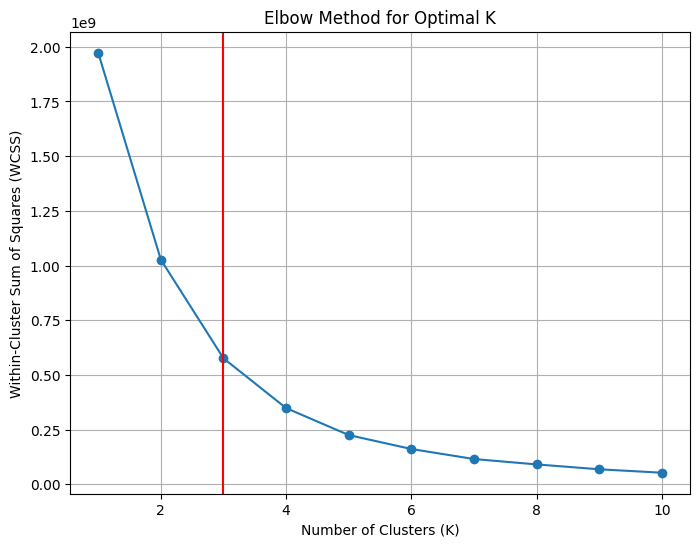

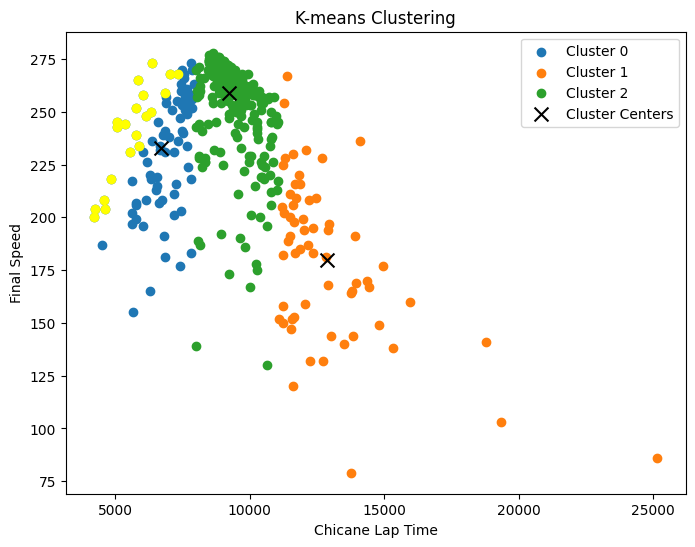

In [91]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_agg_copy = df_agg_total.drop(['Rank'], axis = 1)

k_values = range(1, 11)
wcss = []
data = df_agg_copy[['CURRENT_LAP_TIME_MS', 'SPEED_KPH']].values

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.axvline(x=3, color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import math

data = df_agg_copy[['CURRENT_LAP_TIME_MS', 'SPEED_KPH']].values

k = 3

kmeans = KMeans(n_clusters=k)
kmeans.fit(df_agg_copy)

cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(df_agg_copy.loc[cluster_labels == i, 'CURRENT_LAP_TIME_MS'], df_agg_copy.loc[cluster_labels == i, 'SPEED_KPH'], label=f'Cluster {i}')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=100, label='Cluster Centers')

plt.scatter(df_agg_copy['CURRENT_LAP_TIME_MS'].values[:20],df_agg_copy['SPEED_KPH'].values[:20], color = "yellow")

plt.xlabel('Chicane Lap Time')
plt.ylabel('Final Speed')
plt.title('K-means Clustering')
plt.legend()
plt.show()

cluster_df = df_agg_copy[cluster_labels == 1]
cluster_df

ls_best = list(cluster_df.index)
best_df = df[df['agg'].isin(ls_best)]

In [92]:
cluster_df

,CURRENT_LAP_TIME_MS,SPEED_KPH
agg,,
1.5252214301391235e+19_1,11394,267.0
1.0840886082995628e+19_1,11294,254.0
1.7510197413735965e+19_1,11328,228.0
1.852644834279608e+18_1,11237,225.0
1.3287889083754013e+19_1,11611,230.0
...,...,...
2.6296057087567524e+18_2,15315,138.0
1.2869129974679448e+19_21,13781,79.0
2.5846237170413824e+18_1,18803,141.0


In [93]:
grouped = df.groupby(["agg"])
result = grouped["SPEED_KPH"].last()

last_time = pd.DataFrame(result)
last_time

grouped = df.groupby(["agg"])
result = grouped["CURRENT_LAP_TIME_MS"].last() - grouped["CURRENT_LAP_TIME_MS"].first()

time_sector0 = pd.DataFrame(result)
time_sector0

,CURRENT_LAP_TIME_MS
agg,
1.00346768666644e+19_1,9292
1.00346768666644e+19_2,9309
1.0045550089308109e+19_1,6890
1.0045550089308109e+19_2,5764
1.0045550089308109e+19_3,8175
...,...
9.93719767677717e+18_2,8759
9.93719767677717e+18_3,8693
9.943356580072892e+18_1,8674


In [94]:
grouped = df.groupby(["agg"])
result = grouped["SPEED_KPH"].last()

counts = pd.DataFrame(result)
counts

,SPEED_KPH
agg,
1.00346768666644e+19_1,264.0
1.00346768666644e+19_2,264.0
1.0045550089308109e+19_1,257.0
1.0045550089308109e+19_2,206.0
1.0045550089308109e+19_3,262.0
...,...
9.93719767677717e+18_2,271.0
9.93719767677717e+18_3,271.0
9.943356580072892e+18_1,274.0


In [95]:
value_counts = pd.value_counts(sorted(counts["SPEED_KPH"]))
value_counts

273.0    29
272.0    26
270.0    24
274.0    24
268.0    21
         ..
182.0     1
178.0     1
175.0     1
173.0     1
278.0     1
Length: 119, dtype: int64

In [96]:
df_agg_total = pd.concat([time_sector0, last_time], axis = 1)
df_agg_total

,CURRENT_LAP_TIME_MS,SPEED_KPH
agg,,
1.00346768666644e+19_1,9292,264.0
1.00346768666644e+19_2,9309,264.0
1.0045550089308109e+19_1,6890,257.0
1.0045550089308109e+19_2,5764,206.0
1.0045550089308109e+19_3,8175,262.0
...,...,...
9.93719767677717e+18_2,8759,271.0
9.93719767677717e+18_3,8693,271.0
9.943356580072892e+18_1,8674,274.0


In [97]:
# Adding new columns
df_agg_total = df_agg_total.assign(
    BEFORE_ENTRY_BRAKE_X = 0,
    BEFORE_ENTRY_BRAKE_Y = 0,
    BEFORE_ENTRY_BRAKE_GEAR = 0,
    BEFORE_ENTRY_BRAKE_STEERING = 0,
    BEFORE_ENTRY_BRAKE_SPEED = 0,
    BEFORE_ENTRY_BRAKE_RPM = 0,

    WITHIN_BRAKE_X = 0,
    WITHIN_BRAKE_Y = 0,
    WTHIN_BRAKE_GEAR = 0,
    WITHIN_BRAKE_STEERING = 0,
    WITHIN_BRAKE_SPEED = 0,
    WITHIN_BRAKE_RPM = 0,

    WITHIN_THROTTLE_X = 0,
    WITHIN_THROTTLE_Y = 0,
    WITHIN_THROTTLE_GEAR = 0,
    WITHIN_THROTTLE_STEERING = 0,
    WITHIN_THROTTLE_SPEED = 0,
    WITHIN_THROTTLE_RPM = 0,
)

Text(0.5, 1.0, 'Brake')

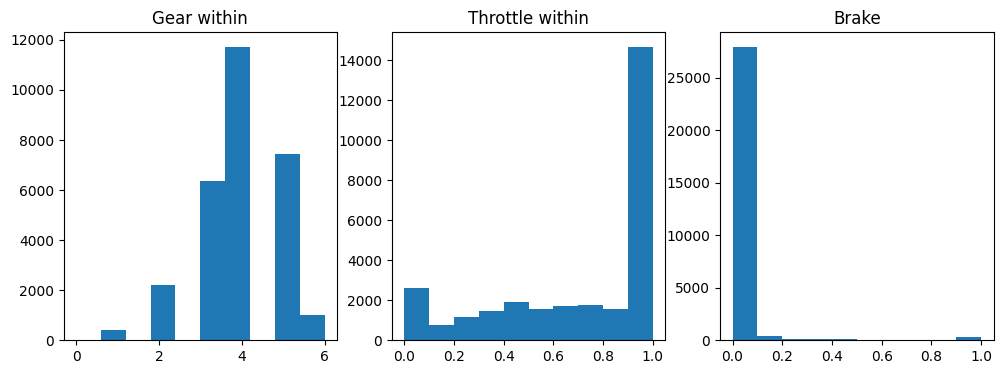

In [98]:
# Within BRAKE
condition = (350 < df["WORLDPOSX"]) & (df["WORLDPOSX"] < 400) & (0 < df["WORLDPOSY"]) & (df["WORLDPOSY"] < 200)
segmented_df = df[condition]

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot the first subplot
axs[0].hist(segmented_df["GEAR"])
axs[0].set_title('Gear within')

# Plot the second subplot
axs[1].hist(segmented_df["THROTTLE"])
axs[1].set_title('Throttle within')

# Plot the third subplot
axs[2].hist(segmented_df["BRAKE"])
axs[2].set_title('Brake')

In [99]:
# For each agg, we find the point of brake, the point of throttle etc

for i, elem in enumerate(df_agg_total.index):
    df_temp = df[df["agg"] == elem]

    counter_before = 0
    counter_within_brake = 0
    counter_within_throttle = 0

    for index, row in df_temp.iterrows():
        # BEFORE ENTRY
        if (200 < row["WORLDPOSX"] < 350) & (200 < row["WORLDPOSY"] < 400) and (counter_before == 0) and (row["BRAKE"] > 0.5):
            df_agg_total.loc[elem, 'BEFORE_ENTRY_BRAKE_X'] = row["WORLDPOSX"]
            df_agg_total.loc[elem, 'BEFORE_ENTRY_BRAKE_Y'] = row["WORLDPOSY"]
            df_agg_total.loc[elem, 'BEFORE_ENTRY_BRAKE_GEAR'] = row["GEAR"]
            df_agg_total.loc[elem, 'BEFORE_ENTRY_BRAKE_STEERING'] = row["STEERING"]
            df_agg_total.loc[elem, 'BEFORE_ENTRY_BRAKE_SPEED'] = row["SPEED_KPH"]
            df_agg_total.loc[elem, 'BEFORE_ENTRY_BRAKE_RPM'] = row["ENGINE_RPM"]
            counter_before = 1


        # WITHIN BRAKE. We expect very little braking so we find when there is a little brake.
        if (350 < row["WORLDPOSX"] < 400) & (100 < row["WORLDPOSY"] < 250) and (counter_within_brake == 0) and row["BRAKE"] > 0:
            df_agg_total.loc[elem, 'WITHIN_BRAKE_X'] = row["WORLDPOSX"]
            df_agg_total.loc[elem, 'WITHIN_BRAKE_Y'] = row["WORLDPOSY"]
            df_agg_total.loc[elem, 'WITHIN_BRAKE_GEAR'] = row["GEAR"]
            df_agg_total.loc[elem, 'WITHIN_BRAKE_STEERING'] = row["STEERING"]
            df_agg_total.loc[elem, 'WITHIN_BRAKE_SPEED'] = row["SPEED_KPH"]
            df_agg_total.loc[elem, 'WITHIN_BRAKE_RPM'] = row["ENGINE_RPM"]
            counter_within_brake = 1


        # WITHIN THROTTLE
        if (350 < row["WORLDPOSX"] < 500) & (-100 < row["WORLDPOSY"] < 100) and (counter_within_throttle == 0) and row["THROTTLE"] > 0.5:
            df_agg_total.loc[elem, 'WITHIN_THROTTLE_X'] = row["WORLDPOSX"]
            df_agg_total.loc[elem, 'WITHIN_THROTTLE_Y'] = row["WORLDPOSY"]
            df_agg_total.loc[elem, 'WITHIN_THROTTLE_GEAR'] = row["GEAR"]
            df_agg_total.loc[elem, 'WITHIN_THROTTLE_STEERING'] = row["STEERING"]
            df_agg_total.loc[elem, 'WITHIN_THROTTLE_SPEED'] = row["SPEED_KPH"]
            df_agg_total.loc[elem, 'WITHIN_THROTTLE_RPM'] = row["ENGINE_RPM"]
            counter_within_throttle = 1

In [100]:
df_agg_total = df_agg_total.dropna(axis=1)
df_agg_total

,CURRENT_LAP_TIME_MS,SPEED_KPH,BEFORE_ENTRY_BRAKE_X,BEFORE_ENTRY_BRAKE_Y,BEFORE_ENTRY_BRAKE_GEAR,BEFORE_ENTRY_BRAKE_STEERING,BEFORE_ENTRY_BRAKE_SPEED,BEFORE_ENTRY_BRAKE_RPM,WITHIN_BRAKE_X,WITHIN_BRAKE_Y,WTHIN_BRAKE_GEAR,WITHIN_BRAKE_STEERING,WITHIN_BRAKE_SPEED,WITHIN_BRAKE_RPM,WITHIN_THROTTLE_X,WITHIN_THROTTLE_Y,WITHIN_THROTTLE_GEAR,WITHIN_THROTTLE_STEERING,WITHIN_THROTTLE_SPEED,WITHIN_THROTTLE_RPM
agg,,,,,,,,,,,,,,,,,,,,
1.00346768666644e+19_1,9292,264.0,317.043945,270.647095,8,0.004349,314,10905,351.356781,236.377853,0,0.083635,225,9577,368.082977,98.278923,4,-0.140398,172,10706
1.00346768666644e+19_2,9309,264.0,310.493561,277.280243,8,0.006088,322,11187,350.288940,238.674042,0,0.171527,241,9337,367.813263,98.085762,4,-0.099107,164,10314
1.0045550089308109e+19_1,6890,257.0,326.941986,261.094025,8,-0.008652,278,9431,0.000000,0.000000,0,0.000000,0,0,369.129425,94.604286,4,-0.121080,188,11872
1.0045550089308109e+19_2,5764,206.0,0.000000,0.000000,0,0.000000,0,0,0.000000,0.000000,0,0.000000,0,0,367.765686,98.796402,5,-0.141405,195,10702
1.0045550089308109e+19_3,8175,262.0,311.309509,276.671387,8,-0.006088,293,9950,0.000000,0.000000,0,0.000000,0,0,378.584595,63.873695,5,-0.179675,208,11371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.93719767677717e+18_2,8759,271.0,320.462250,267.711731,8,0.002518,290,9877,352.396942,236.498169,0,0.112932,231,10356,367.964752,98.145020,5,-0.156329,206,11225
9.93719767677717e+18_3,8693,271.0,327.554535,261.473999,8,0.009018,286,9729,352.182373,236.721283,0,0.093980,232,10379,368.967682,99.096771,5,-0.174456,204,11190
9.943356580072892e+18_1,8674,274.0,314.986145,273.048645,8,0.003891,309,10545,351.546967,237.041397,0,0.087022,216,9617,368.035370,99.284180,5,-0.153491,211,11483


In [101]:
import warnings
warnings.filterwarnings("ignore")

In [102]:
# Create a new DataFrame to store the rows that satisfy the condition
final_df = pd.DataFrame(columns=df_agg_total.columns)

# If X, Y = 0 for each of the 3 we can
for index, row in df_agg_total.iterrows():
  if (row["BEFORE_ENTRY_BRAKE_X"] == row["BEFORE_ENTRY_BRAKE_Y"] == row["WITHIN_BRAKE_X"] == row["WITHIN_BRAKE_Y"] == row["WITHIN_THROTTLE_X"] == row["WITHIN_THROTTLE_Y"] == 0):
    continue
  else:
    final_df = final_df.append(row)


In [103]:
final_df

,CURRENT_LAP_TIME_MS,SPEED_KPH,BEFORE_ENTRY_BRAKE_X,BEFORE_ENTRY_BRAKE_Y,BEFORE_ENTRY_BRAKE_GEAR,BEFORE_ENTRY_BRAKE_STEERING,BEFORE_ENTRY_BRAKE_SPEED,BEFORE_ENTRY_BRAKE_RPM,WITHIN_BRAKE_X,WITHIN_BRAKE_Y,WTHIN_BRAKE_GEAR,WITHIN_BRAKE_STEERING,WITHIN_BRAKE_SPEED,WITHIN_BRAKE_RPM,WITHIN_THROTTLE_X,WITHIN_THROTTLE_Y,WITHIN_THROTTLE_GEAR,WITHIN_THROTTLE_STEERING,WITHIN_THROTTLE_SPEED,WITHIN_THROTTLE_RPM
1.00346768666644e+19_1,9292.0,264.0,317.043945,270.647095,8.0,0.004349,314.0,10905.0,351.356781,236.377853,0.0,0.083635,225.0,9577.0,368.082977,98.278923,4.0,-0.140398,172.0,10706.0
1.00346768666644e+19_2,9309.0,264.0,310.493561,277.280243,8.0,0.006088,322.0,11187.0,350.288940,238.674042,0.0,0.171527,241.0,9337.0,367.813263,98.085762,4.0,-0.099107,164.0,10314.0
1.0045550089308109e+19_1,6890.0,257.0,326.941986,261.094025,8.0,-0.008652,278.0,9431.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,369.129425,94.604286,4.0,-0.121080,188.0,11872.0
1.0045550089308109e+19_2,5764.0,206.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,367.765686,98.796402,5.0,-0.141405,195.0,10702.0
1.0045550089308109e+19_3,8175.0,262.0,311.309509,276.671387,8.0,-0.006088,293.0,9950.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,378.584595,63.873695,5.0,-0.179675,208.0,11371.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.93719767677717e+18_2,8759.0,271.0,320.462250,267.711731,8.0,0.002518,290.0,9877.0,352.396942,236.498169,0.0,0.112932,231.0,10356.0,367.964752,98.145020,5.0,-0.156329,206.0,11225.0
9.93719767677717e+18_3,8693.0,271.0,327.554535,261.473999,8.0,0.009018,286.0,9729.0,352.182373,236.721283,0.0,0.093980,232.0,10379.0,368.967682,99.096771,5.0,-0.174456,204.0,11190.0
9.943356580072892e+18_1,8674.0,274.0,314.986145,273.048645,8.0,0.003891,309.0,10545.0,351.546967,237.041397,0.0,0.087022,216.0,9617.0,368.035370,99.284180,5.0,-0.153491,211.0,11483.0
9.943356580072892e+18_2,8640.0,273.0,315.281097,272.392517,8.0,0.001144,305.0,10413.0,351.086670,237.644592,0.0,0.091966,231.0,10316.0,365.998932,97.524109,5.0,-0.219226,209.0,11471.0


In [104]:
final_df["noise"] = np.random.normal(0, 1, len(final_df))
final_df

,CURRENT_LAP_TIME_MS,SPEED_KPH,BEFORE_ENTRY_BRAKE_X,BEFORE_ENTRY_BRAKE_Y,BEFORE_ENTRY_BRAKE_GEAR,BEFORE_ENTRY_BRAKE_STEERING,BEFORE_ENTRY_BRAKE_SPEED,BEFORE_ENTRY_BRAKE_RPM,WITHIN_BRAKE_X,WITHIN_BRAKE_Y,WTHIN_BRAKE_GEAR,WITHIN_BRAKE_STEERING,WITHIN_BRAKE_SPEED,WITHIN_BRAKE_RPM,WITHIN_THROTTLE_X,WITHIN_THROTTLE_Y,WITHIN_THROTTLE_GEAR,WITHIN_THROTTLE_STEERING,WITHIN_THROTTLE_SPEED,WITHIN_THROTTLE_RPM,noise
1.00346768666644e+19_1,9292.0,264.0,317.043945,270.647095,8.0,0.004349,314.0,10905.0,351.356781,236.377853,0.0,0.083635,225.0,9577.0,368.082977,98.278923,4.0,-0.140398,172.0,10706.0,-1.105524
1.00346768666644e+19_2,9309.0,264.0,310.493561,277.280243,8.0,0.006088,322.0,11187.0,350.288940,238.674042,0.0,0.171527,241.0,9337.0,367.813263,98.085762,4.0,-0.099107,164.0,10314.0,1.175220
1.0045550089308109e+19_1,6890.0,257.0,326.941986,261.094025,8.0,-0.008652,278.0,9431.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,369.129425,94.604286,4.0,-0.121080,188.0,11872.0,0.596858
1.0045550089308109e+19_2,5764.0,206.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,367.765686,98.796402,5.0,-0.141405,195.0,10702.0,0.576344
1.0045550089308109e+19_3,8175.0,262.0,311.309509,276.671387,8.0,-0.006088,293.0,9950.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,378.584595,63.873695,5.0,-0.179675,208.0,11371.0,0.355736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.93719767677717e+18_2,8759.0,271.0,320.462250,267.711731,8.0,0.002518,290.0,9877.0,352.396942,236.498169,0.0,0.112932,231.0,10356.0,367.964752,98.145020,5.0,-0.156329,206.0,11225.0,-1.548766
9.93719767677717e+18_3,8693.0,271.0,327.554535,261.473999,8.0,0.009018,286.0,9729.0,352.182373,236.721283,0.0,0.093980,232.0,10379.0,368.967682,99.096771,5.0,-0.174456,204.0,11190.0,0.163196
9.943356580072892e+18_1,8674.0,274.0,314.986145,273.048645,8.0,0.003891,309.0,10545.0,351.546967,237.041397,0.0,0.087022,216.0,9617.0,368.035370,99.284180,5.0,-0.153491,211.0,11483.0,-0.884995
9.943356580072892e+18_2,8640.0,273.0,315.281097,272.392517,8.0,0.001144,305.0,10413.0,351.086670,237.644592,0.0,0.091966,231.0,10316.0,365.998932,97.524109,5.0,-0.219226,209.0,11471.0,1.882822


In [105]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_error, r2_score

In [248]:
## Random Forest Speed
 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = final_df.drop(['SPEED_KPH', 'CURRENT_LAP_TIME_MS'], axis=1)
y = final_df['SPEED_KPH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
k = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - k - 1)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = np.sqrt(mse)


print(f'Mean Squared Error: {mse}')
print("Mean Absolute Error (MAE):", mae)
print(f"Train Adjusted R-squared: {adjusted_r_squared}")
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error (RMSE):", rmse)
point = np.array([330.192566, 259.200989, 7.000000, 0.005081, 258.000000, 10268.000000,
                  375.915253, 197.832703, 0.000000, 0.483452, 161.000000, 9667.000000,
                  368.020569, 97.216644, 4.000000, -0.167224, 185.000000, 11658.000000, 0]).reshape(1, -1)

prediction = rf_model.predict(point)
print('Final speed is:', prediction)

Mean Squared Error: 226.52241851851855
Mean Absolute Error (MAE): 10.0579012345679
Train Adjusted R-squared: 0.7397440594367611
Mean Absolute Percentage Error (MAPE): 4.667804976375329
Root Mean Squared Error (RMSE): 15.050661730253543
Final speed is: [234.48]


In [249]:
num_samples = 1000

# Store mean predictions from each bootstrap sample
bootstrap_means = []

# Set seed for reproducibility
np.random.seed(42)

# Perform bootstrapping
for _ in range(num_samples):
    # Randomly sample with replacement
    indices = np.random.choice(len(X_test), len(X_test), replace=True)
    bootstrap_sample = X_test.iloc[indices, :]

    # Make predictions on the bootstrap sample
    preds = rf_model.predict(bootstrap_sample)

    # Store mean prediction
    bootstrap_means.append(np.mean(preds))

# Calculate confidence interval for the mean prediction
lower_bound_mean = np.percentile(bootstrap_means, 2.5)
upper_bound_mean = np.percentile(bootstrap_means, 97.5)

print(lower_bound_mean)
print(upper_bound_mean)


243.3654027777778
251.71558796296299


In [182]:
## Random Forest Speed
 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = final_df.drop(['SPEED_KPH', 'CURRENT_LAP_TIME_MS'], axis=1)
y = final_df['CURRENT_LAP_TIME_MS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
k = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - k - 1)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = np.sqrt(mse)


print(f'Mean Squared Error: {mse}')
print("Mean Absolute Error (MAE):", mae)
print(f"Train Adjusted R-squared: {adjusted_r_squared}")
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 1451419.747345062
Mean Absolute Error (MAE): 657.9173456790124
Train Adjusted R-squared: 0.5262341984190033
Mean Absolute Percentage Error (MAPE): 7.866319127938456
Root Mean Squared Error (RMSE): 1204.7488316429537


In [183]:
point = np.array([330.192566, 259.200989, 7.000000, 0.005081, 258.000000, 10268.000000,
                  375.915253, 197.832703, 0.000000, 0.483452, 161.000000, 9667.000000,
                  368.020569, 97.216644, 4.000000, -0.167224, 185.000000, 11658.000000, 0]).reshape(1, -1)

prediction = rf_model.predict(point)
print(prediction)

[8328.77]


In [205]:
warnings.filterwarnings("ignore", category=UserWarning, message="[LightGBM]")

In [223]:
## LightGBM Speed

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = final_df.drop(['SPEED_KPH', 'CURRENT_LAP_TIME_MS'], axis=1)
y = final_df['SPEED_KPH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
k = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - k - 1)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = np.sqrt(mse)


print(f'Mean Squared Error: {mse}')
print("Mean Absolute Error (MAE):", mae)
print(f"Train Adjusted R-squared: {adjusted_r_squared}")
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error (RMSE):", rmse)

point = np.array([330.192566, 259.200989, 7.000000, 0.005081, 258.000000, 10268.000000,
                  375.915253, 197.832703, 0.000000, 0.483452, 161.000000, 9667.000000,
                  368.020569, 97.216644, 4.000000, -0.167224, 185.000000, 11658.000000, 0]).reshape(1, -1)

prediction = lgb_model.predict(point)
print(prediction)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1673
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 18
[LightGBM] [Info] Start training from score 246.904762
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [225]:
import statsmodels.api as sm

# Fit quantile regression model for lower and upper bounds
quantile_model_lower = sm.QuantReg(y_train, X_train).fit(q=0.025)  # 2.5th percentile
quantile_model_upper = sm.QuantReg(y_train, X_train).fit(q=0.975)  # 97.5th percentile

# Predict lower and upper bounds for each observation
lower_bound = quantile_model_lower.predict(X_test)
upper_bound = quantile_model_upper.predict(X_test)

# Calculate point estimate (median)
point_estimate = np.median(y_pred)

# Calculate confidence interval for the point estimate
lower_bound_median = np.percentile(y_pred, 2.5)
upper_bound_median = np.percentile(y_pred, 97.5)

print(point_estimate)
print(lower_bound_median)
print(upper_bound_median)

255.21028967623394
170.12685798872286
275.5717423400847


In [207]:
## LightGBM Speed

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = final_df.drop(['SPEED_KPH', 'CURRENT_LAP_TIME_MS'], axis=1)
y = final_df['CURRENT_LAP_TIME_MS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
k = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - k - 1)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = np.sqrt(mse)


print(f'Mean Squared Error: {mse}')
print("Mean Absolute Error (MAE):", mae)
print(f"Train Adjusted R-squared: {adjusted_r_squared}")
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error (RMSE):", rmse)

point = np.array([330.192566, 259.200989, 7.000000, 0.005081, 258.000000, 10268.000000,
                  375.915253, 197.832703, 0.000000, 0.483452, 161.000000, 9667.000000,
                  368.020569, 97.216644, 4.000000, -0.167224, 185.000000, 11658.000000, 0]).reshape(1, -1)

prediction = lgb_model.predict(point)
print(prediction)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1673
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 18
[LightGBM] [Info] Start training from score 9236.362434
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [211]:
num_samples = 1000

# Store mean predictions from each bootstrap sample
bootstrap_means = []

# Set seed for reproducibility
np.random.seed(42)

# Perform bootstrapping
for _ in range(num_samples):
    # Randomly sample with replacement
    indices = np.random.choice(len(X_test), len(X_test), replace=True)
    bootstrap_sample = X_test.iloc[indices, :]

    # Make predictions on the bootstrap sample
    preds = lgb_model.predict(bootstrap_sample)

    # Store mean prediction
    bootstrap_means.append(np.mean(preds))

# Calculate confidence interval for the mean prediction
lower_bound_mean = np.percentile(bootstrap_means, 2.5)
upper_bound_mean = np.percentile(bootstrap_means, 97.5)

In [216]:
lower_bound_mean

9002.49315517109

In [217]:
upper_bound_mean

9407.832072575093

In [108]:
## XGBoost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = final_df.drop('SPEED_KPH', axis=1)
y = final_df['SPEED_KPH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
k = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - k - 1)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = np.sqrt(mse)


print(f'Mean Squared Error: {mse}')
print("Mean Absolute Error (MAE):", mae)
print(f"Train Adjusted R-squared: {adjusted_r_squared}")
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 203.13803555662054
Mean Absolute Error (MAE): 9.655432241934317
Train Adjusted R-squared: 0.76495558204208
Mean Absolute Percentage Error (MAPE): 4.4612319315034465
Root Mean Squared Error (RMSE): 14.252650123981173


In [109]:
## Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = final_df.drop('SPEED_KPH', axis=1)
y = final_df['SPEED_KPH']

# Standardize the features (X) for normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
k = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - k - 1)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = np.sqrt(mse)


print(f'Mean Squared Error: {mse}')
print("Mean Absolute Error (MAE):", mae)
print(f"Train Adjusted R-squared: {adjusted_r_squared}")
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 222.1548555782253
Mean Absolute Error (MAE): 10.51955162121783
Train Adjusted R-squared: 0.7429518377352058
Mean Absolute Percentage Error (MAPE): 4.780850761477163
Root Mean Squared Error (RMSE): 14.90486013279646


In [110]:
## Lasso Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = final_df.drop('SPEED_KPH', axis=1)
y = final_df['SPEED_KPH']

# Standardize the features (X) for normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
k = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - k - 1)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = np.sqrt(mse)


print(f'Mean Squared Error: {mse}')
print("Mean Absolute Error (MAE):", mae)
print(f"Train Adjusted R-squared: {adjusted_r_squared}")
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 273.76404682674865
Mean Absolute Error (MAE): 11.656904287616483
Train Adjusted R-squared: 0.683236520093931
Mean Absolute Percentage Error (MAPE): 5.308722472091996
Root Mean Squared Error (RMSE): 16.54581659594801


In [111]:
## Ridge Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = final_df.drop('SPEED_KPH', axis=1)
y = final_df['SPEED_KPH']

# Standardize the features (X) for normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
k = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - k - 1)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = np.sqrt(mse)


print(f'Mean Squared Error: {mse}')
print("Mean Absolute Error (MAE):", mae)
print(f"Train Adjusted R-squared: {adjusted_r_squared}")
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 231.29263097554946
Mean Absolute Error (MAE): 10.65110114839492
Train Adjusted R-squared: 0.7323788148455777
Mean Absolute Percentage Error (MAPE): 4.846982001040718
Root Mean Squared Error (RMSE): 15.20830795899233


In [119]:
## KNN Regression

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = final_df.drop('SPEED_KPH', axis=1)
y = final_df['SPEED_KPH']

# Standardize the features (X) for normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Choose the number of neighbors (k) for KNN
k = 5

knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
k = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - k - 1)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = np.sqrt(mse)


print(f'Mean Squared Error: {mse}')
print("Mean Absolute Error (MAE):", mae)
print(f"Train Adjusted R-squared: {adjusted_r_squared}")
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error: 334.2851851851852
Mean Absolute Error (MAE): 11.401234567901232
Train Adjusted R-squared: 0.6132094781338621
Mean Absolute Percentage Error (MAPE): 5.304339979274258
Root Mean Squared Error (RMSE): 18.283467537236618


In [36]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf_model, X_test, y_test, n_repeats=100, random_state=42
)

# Simulated Annealing

In [120]:
## Simulated Annealing

final_df_copy = final_df.drop(["CURRENT_LAP_TIME_MS", "noise"], axis = 1)

X = final_df_copy.drop('SPEED_KPH', axis=1)
y = final_df_copy['SPEED_KPH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1546
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 17
[LightGBM] [Info] Start training from score 246.904762
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

LGBMRegressor(random_state=42)

In [121]:
print(len(X_train.columns))

18


In [122]:
from scipy.optimize import minimize

# Define the objective function that we want to minimize (or maximize)
# In this case, let's say we want to find the input that minimizes the predicted value
def objective_function(inputs):
    # The model expects a 2D array for the inputs
    inputs_2d = np.array(inputs).reshape(1, -1)
    return -lgb_model.predict(inputs_2d)


bounds = [(200, 350), (200, 400), (0, 8), (-1, 1), (min(X_train["BEFORE_ENTRY_BRAKE_SPEED"]), max(X_train["BEFORE_ENTRY_BRAKE_SPEED"])), (min(X_train["BEFORE_ENTRY_BRAKE_RPM"]), max(X_train["BEFORE_ENTRY_BRAKE_RPM"])),
 (350, 400), (100, 250), (0, 8), (-1, 1), (min(X_train["WITHIN_BRAKE_SPEED"]), max(X_train["WITHIN_BRAKE_SPEED"])), (min(X_train["WITHIN_BRAKE_RPM"]), max(X_train["WITHIN_BRAKE_RPM"])),
  (350, 500), (-100, 100), (0, 8), (-1, 1), (min(X_train["WITHIN_THROTTLE_SPEED"]), max(X_train["WITHIN_THROTTLE_SPEED"])),(min(X_train["WITHIN_THROTTLE_RPM"]), max(X_train["WITHIN_THROTTLE_RPM"]))] #track ratio added


# The 'L-BFGS-B' method is a quasi-Newton method that can handle bound constraints
result = minimize(objective_function, x0=X_train.iloc[5], bounds=bounds, method='L-BFGS-B')

# The optimal inputs that minimize the prediction
optimal_inputs = result.x
optimal_prediction = objective_function(optimal_inputs)

optimal_inputs, optimal_prediction

(array([ 3.30192566e+02,  2.59200989e+02,  7.00000000e+00,  5.08125406e-03,
         2.58000000e+02,  1.02680000e+04,  3.52018433e+02,  2.37592331e+02,
         0.00000000e+00,  1.19066149e-01,  1.95000000e+02,  1.01960000e+04,
         3.68020569e+02,  9.72166443e+01,  4.00000000e+00, -1.67223632e-01,
         1.85000000e+02,  1.16580000e+04]),
 array([-251.41591577]))

In [134]:
from scipy.optimize import differential_evolution

result = differential_evolution(objective_function, bounds, seed=61)
optimal_inputs = result.x
d = {'columns' : list(X_train.columns), 'values': optimal_inputs}
d_df = pd.DataFrame(d)
d_df

,columns,values
0,BEFORE_ENTRY_BRAKE_X,285.922880
1,BEFORE_ENTRY_BRAKE_Y,294.137938
2,BEFORE_ENTRY_BRAKE_GEAR,0.434325
3,BEFORE_ENTRY_BRAKE_STEERING,0.284114
4,BEFORE_ENTRY_BRAKE_SPEED,326.290994
5,BEFORE_ENTRY_BRAKE_RPM,11416.230733
6,WITHIN_BRAKE_X,359.615403
7,WITHIN_BRAKE_Y,244.703134
8,WTHIN_BRAKE_GEAR,2.691051
9,WITHIN_BRAKE_STEERING,-0.624547


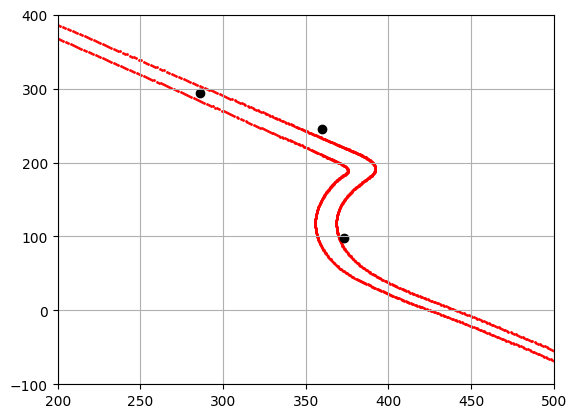

In [135]:
plt.scatter(left["WORLDPOSX"], left["WORLDPOSY"],s=1,c='red')
plt.scatter(right["WORLDPOSX"], right["WORLDPOSY"], s=1,c='red')
plt.scatter(d_df["values"][0], d_df["values"][1], c='black')
plt.scatter(d_df["values"][6],d_df["values"][7], c='black')
plt.scatter(d_df["values"][12],d_df["values"][13], c='black')
plt.xlim(200, 500)
plt.ylim(-100, 400)
plt.grid()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import differential_evolution

# Assuming X_train, left, right, objective_function, and bounds are defined

for i in range(60, 100):
    seed_value = i  # Change the seed for each iteration
    result = differential_evolution(objective_function, bounds, seed=seed_value)
    optimal_inputs = result.x
    
    d = {'columns': list(X_train.columns), 'values': optimal_inputs}
    d_df = pd.DataFrame(d)
    
    plt.scatter(left["WORLDPOSX"], left["WORLDPOSY"], s=1, c='red')
    plt.scatter(right["WORLDPOSX"], right["WORLDPOSY"], s=1, c='red')
    plt.scatter(d_df["values"][0], d_df["values"][1], c='black')
    plt.scatter(d_df["values"][6], d_df["values"][7], c='black')
    plt.scatter(d_df["values"][12], d_df["values"][13], c='black')
    plt.xlim(200, 500)
    plt.ylim(-100, 400)
    plt.title(f'Plot for Seed {seed_value}')
    plt.grid()
    plt.show()

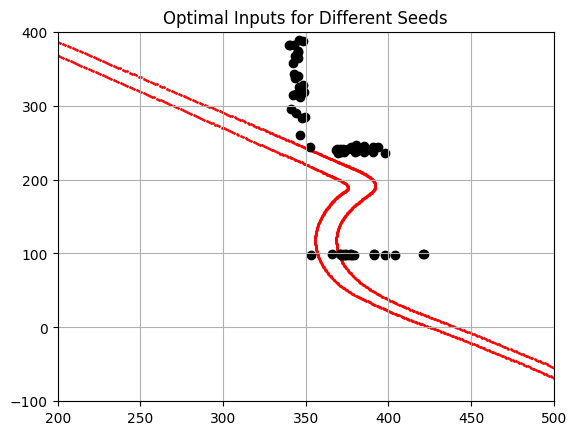

In [132]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import differential_evolution

# Assuming X_train, left, right, objective_function, and bounds are defined

all_optimal_inputs = []

for i in range(125, 150):
    seed_value = i  # Change the seed for each iteration
    result = differential_evolution(objective_function, bounds, seed=seed_value)
    optimal_inputs = result.x
    all_optimal_inputs.append(optimal_inputs)

# Convert the list of optimal inputs to a DataFrame
all_optimal_df = pd.DataFrame(all_optimal_inputs, columns=list(X_train.columns))

# Plot all points on a single plot
plt.scatter(left["WORLDPOSX"], left["WORLDPOSY"], s=1, c='red')
plt.scatter(right["WORLDPOSX"], right["WORLDPOSY"], s=1, c='red')
plt.scatter(all_optimal_df.iloc[:, 0], all_optimal_df.iloc[:, 1], c='black')
plt.scatter(all_optimal_df.iloc[:, 6], all_optimal_df.iloc[:, 7], c='black')
plt.scatter(all_optimal_df.iloc[:, 12], all_optimal_df.iloc[:, 13], c='black')
plt.xlim(200, 500)
plt.ylim(-100, 400)
plt.title('Optimal Inputs for Different Seeds')
plt.grid()
plt.show()